# Define Library

In [1]:
import numpy as np
import pandas as pd

# Import Dataset

In [2]:
df = pd.read_csv('/content/Dataset15_Employee_Promotion.csv')
df

,employee_id,department,education,gender,recruitment_channel,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,0
1,65141,Operations,Bachelor's,m,other,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,0
3,2542,Sales & Marketing,Bachelor's,m,other,0
4,48945,Technology,Bachelor's,m,other,0
...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,0
54804,74592,Operations,Master's & above,f,other,0
54805,13918,Analytics,Bachelor's,m,other,0
54806,13614,Sales & Marketing,NaN,m,sourcing,0


# Data Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          54808 non-null  int64 
 1   department           54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   is_promoted          54808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


In [4]:
# Duplication check for employee_id column

df['employee_id'].duplicated().sum()

0

In [5]:
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [6]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [7]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [8]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [9]:
df['is_promoted'].unique()

array([0, 1])

In [10]:
df.isnull().sum()

employee_id               0
department                0
education              2409
gender                    0
recruitment_channel       0
is_promoted               0
dtype: int64

The data quality free from duplication and inconsistency, there are only 2409 blank data rows or arround 4.4% of total row in 'education' column.

# Handling Missing Value

In [11]:
df.groupby('education')['education'].count()

education
Bachelor's          36669
Below Secondary       805
Master's & above    14925
Name: education, dtype: int64

In [12]:
df['education'].mode()

0    Bachelor's
dtype: object

In [13]:
# Fill in the blank row in 'education' column with mode in this column

modus = df['education'].mode()[0]
df['education'] = df['education'].fillna(modus)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   employee_id          54808 non-null  int64 
 1   department           54808 non-null  object
 2   education            54808 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   is_promoted          54808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ MB


In [14]:
df

,employee_id,department,education,gender,recruitment_channel,is_promoted
0,65438,Sales & Marketing,Master's & above,f,sourcing,0
1,65141,Operations,Bachelor's,m,other,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,0
3,2542,Sales & Marketing,Bachelor's,m,other,0
4,48945,Technology,Bachelor's,m,other,0
...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,0
54804,74592,Operations,Master's & above,f,other,0
54805,13918,Analytics,Bachelor's,m,other,0
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,0


# Analyze Each Variable

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# department

df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

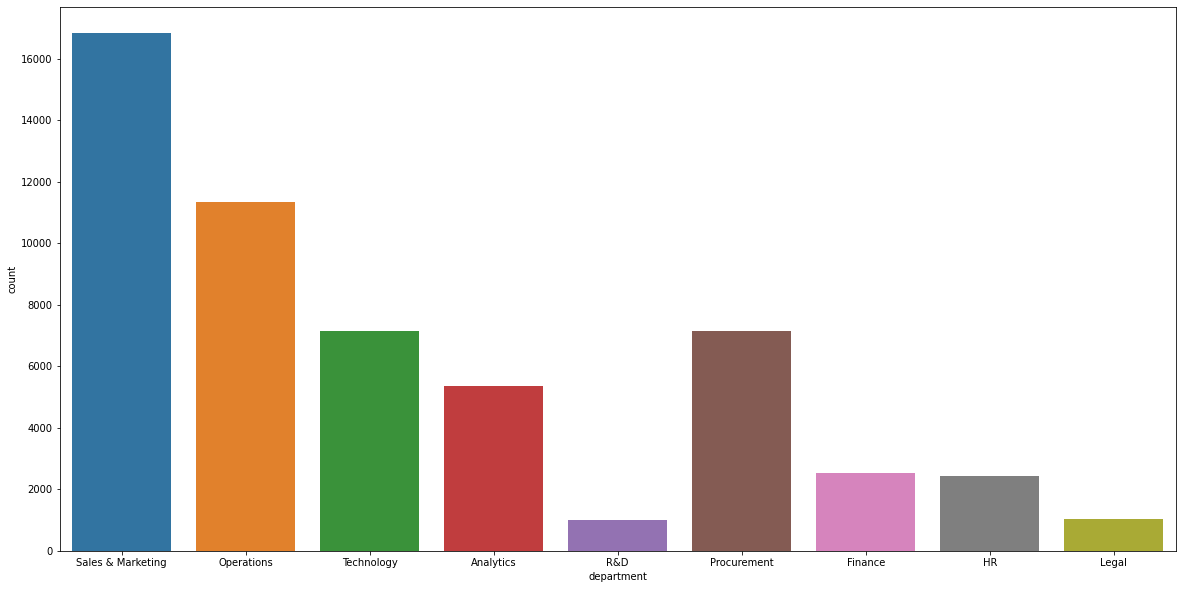

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='department')

The highest number of employee is Sales & Marketing department.

In [18]:
per_is_promoted = df.groupby(['department', 'is_promoted']).size().to_frame('Total')
per_department = df.groupby(['department']).size().to_frame('Aggregate')
per_is_prom_dept = per_is_promoted.join(
    per_department,
    on='department'
    )
per_is_prom_dept['Ratio'] = per_is_prom_dept['Total'] / per_is_prom_dept['Aggregate'] * 100
per_is_prom_dept = per_is_prom_dept.reset_index()

In [19]:
per_is_prom_dept

,department,is_promoted,Total,Aggregate,Ratio
0,Analytics,0,4840,5352,90.433483
1,Analytics,1,512,5352,9.566517
2,Finance,0,2330,2536,91.876972
3,Finance,1,206,2536,8.123028
4,HR,0,2282,2418,94.375517
5,HR,1,136,2418,5.624483
6,Legal,0,986,1039,94.898941
7,Legal,1,53,1039,5.101059
8,Operations,0,10325,11348,90.985196
9,Operations,1,1023,11348,9.014804


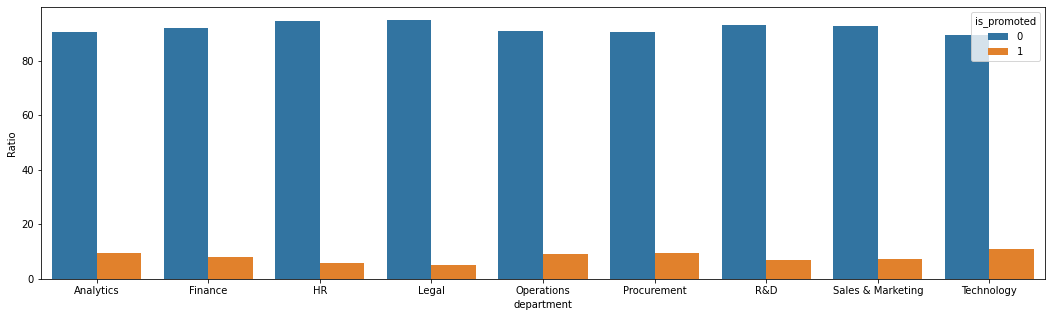

In [20]:
plt.figure(figsize=(18,5))
sns.barplot(data=per_is_prom_dept, y='Ratio', x='department', hue='is_promoted')

The highest employee promotion rate is Technology department, which is about 10.7%.

In [21]:
# education

df['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

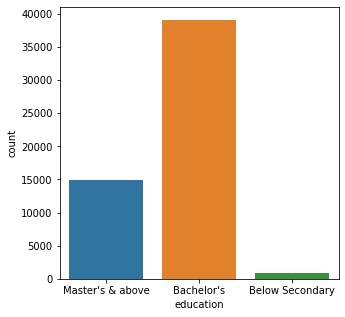

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='education')

The higest number employee's education is Bachelor's.

In [23]:
per_is_promoted = df.groupby(['education', 'is_promoted']).size().to_frame('Total')
per_education = df.groupby(['education']).size().to_frame('Aggregate')
per_is_prom_educ = per_is_promoted.join(
    per_education,
    on='education'
    )
per_is_prom_educ['Ratio'] = per_is_prom_educ['Total'] / per_is_prom_educ['Aggregate'] * 100
per_is_prom_educ = per_is_prom_educ.reset_index()

In [24]:
per_is_prom_educ

,education,is_promoted,Total,Aggregate,Ratio
0,Bachelor's,0,35948,39078,91.990378
1,Bachelor's,1,3130,39078,8.009622
2,Below Secondary,0,738,805,91.677019
3,Below Secondary,1,67,805,8.322981
4,Master's & above,0,13454,14925,90.144054
5,Master's & above,1,1471,14925,9.855946


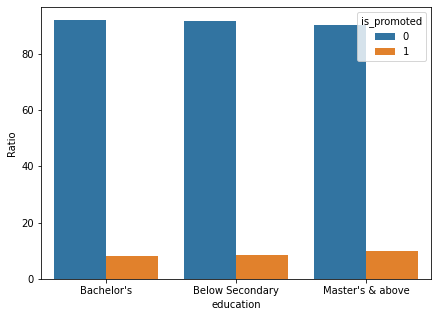

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(data=per_is_prom_educ, y='Ratio', x='education', hue='is_promoted')

The highest percentage of employee promotions is Master's & above education. Which is 9.8%.

In [26]:
# gender

df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

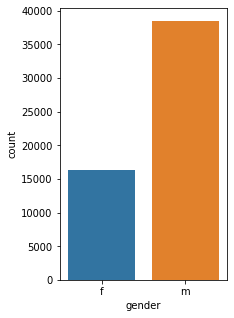

In [27]:
plt.figure(figsize=(3,5))
sns.countplot(data=df, x='gender')

Male employeess dominate over female with a percentage of 70%.

In [28]:
per_is_promoted = df.groupby(['gender', 'is_promoted']).size().to_frame('Total')
per_gender = df.groupby(['gender']).size().to_frame('Aggregate')
per_is_prom_gender = per_is_promoted.join(
    per_gender,
    on='gender'
    )
per_is_prom_gender['Ratio'] = per_is_prom_gender['Total'] / per_is_prom_gender['Aggregate'] * 100
per_is_prom_gender = per_is_prom_gender.reset_index()

In [29]:
per_is_prom_gender

,gender,is_promoted,Total,Aggregate,Ratio
0,f,0,14845,16312,91.006621
1,f,1,1467,16312,8.993379
2,m,0,35295,38496,91.684850
3,m,1,3201,38496,8.315150


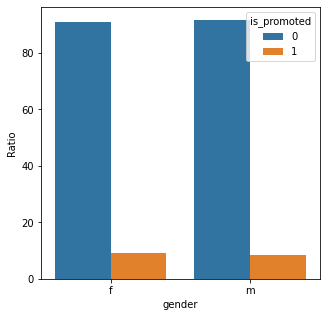

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(data=per_is_prom_gender, y='Ratio', x='gender', hue='is_promoted')

The percentage employee promotions for male and female almost the same.

In [31]:
# recruitment_channel

df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

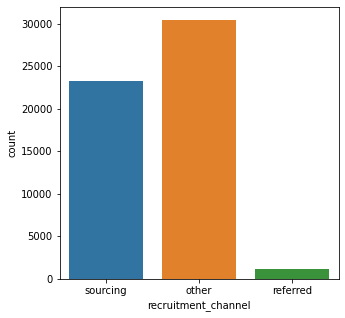

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='recruitment_channel')

In [33]:
per_is_promoted = df.groupby(['recruitment_channel', 'is_promoted']).size().to_frame('Total')
per_recruitment_channel = df.groupby(['recruitment_channel']).size().to_frame('Aggregate')
per_is_prom_recr = per_is_promoted.join(
    per_recruitment_channel,
    on='recruitment_channel'
    )
per_is_prom_recr['Ratio'] = per_is_prom_recr['Total'] / per_is_prom_recr['Aggregate'] * 100
per_is_prom_recr = per_is_prom_recr.reset_index()

In [34]:
per_is_prom_recr

,recruitment_channel,is_promoted,Total,Aggregate,Ratio
0,other,0,27890,30446,91.604809
1,other,1,2556,30446,8.395191
2,referred,0,1004,1142,87.915937
3,referred,1,138,1142,12.084063
4,sourcing,0,21246,23220,91.498708
5,sourcing,1,1974,23220,8.501292


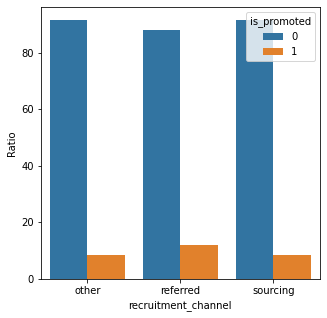

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(data=per_is_prom_recr, y='Ratio', x='recruitment_channel', hue='is_promoted')

The percentage employee promotion from referred is highest. Which is about 12%.

#Feature Selection

In [36]:
FEATURE = ['department', 'education', 'gender', 'recruitment_channel']
TARGET = ['is_promoted']

X = df[FEATURE]
y = df[TARGET]

In [37]:
X.head()

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other


In [38]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [39]:
df_mod = pd.concat([X, y], axis=1)
df_mod

,department,education,gender,recruitment_channel,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,0
1,Operations,Bachelor's,m,other,0
2,Sales & Marketing,Bachelor's,m,sourcing,0
3,Sales & Marketing,Bachelor's,m,other,0
4,Technology,Bachelor's,m,other,0
...,...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing,0
54804,Operations,Master's & above,f,other,0
54805,Analytics,Bachelor's,m,other,0
54806,Sales & Marketing,Bachelor's,m,sourcing,0


In [40]:
df_mod.shape

(54808, 5)

In [41]:
y.value_counts()

is_promoted
0              50140
1               4668
dtype: int64

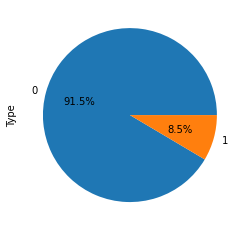

In [42]:
df.groupby('is_promoted').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

target data is imbalance.

#Feature Engineering

In [43]:
# Transformasi data

FEATURE_CAT = ['gender', 'recruitment_channel']
FEATURE_NUM = ['is_promoted']

In [44]:
# One hot encoding column 'gender', 'recruitment_channel'

from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder(sparse=False)
hot_encoder.fit(df_mod[FEATURE_CAT])

OneHotEncoder(sparse=False)

In [45]:
X_encode = hot_encoder.transform(df_mod[FEATURE_CAT])
X_encode

array([[1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [46]:
# Label encoding 'department', 'education' column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
department, education = le.fit_transform(df_mod['department']), le.fit_transform(df_mod['education'])
department, education = department.reshape(-1, 1), education.reshape(-1, 1)
department, education

(array([[7],
        [4],
        [7],
        ...,
        [0],
        [7],
        [2]]), array([[2],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [47]:
X_encoded = np.column_stack([department, education, X_encode,])
X_encoded

array([[7., 2., 1., ..., 0., 0., 1.],
       [4., 0., 0., ..., 1., 0., 0.],
       [7., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [7., 0., 0., ..., 0., 0., 1.],
       [2., 0., 0., ..., 1., 0., 0.]])

In [48]:
X_encoded.shape

(54808, 7)

In [49]:
# Split data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
print("Shape of X-train:", X_train.shape)
print("Shape of X-test:", X_test.shape)
print("Shape of y-train: \n", np.unique(y_train, return_counts=True))
print("Shape of y-test: \n", np.unique(y_test, return_counts=True))

Shape of X-train: (43846, 7)
Shape of X-test: (10962, 7)
Shape of y-train: 
 (array([0, 1]), array([40112,  3734]))
Shape of y-test: 
 (array([0, 1]), array([10028,   934]))


# Build Model

In [51]:
import tensorflow as tf

In [80]:
model = tf.keras.models.Sequential()

In [81]:
# ANN architecture

model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [82]:
# Compiling ANN

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# Train model before handling imbalanca data

model.fit(X_train, y_train, batch_size=42, epochs=100)

Epoch 1/100
1044/1044 [==============================] - 3s 2ms/step - loss: 0.3198 - accuracy: 0.9025
Epoch 2/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.9148
Epoch 3/100
1044/1044 [==============================] - 3s 3ms/step - loss: 0.2911 - accuracy: 0.9148
Epoch 4/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.9148
Epoch 5/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.9148
Epoch 6/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2913 - accuracy: 0.9148
Epoch 7/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2910 - accuracy: 0.9148
Epoch 8/100
1044/1044 [==============================] - 3s 3ms/step - loss: 0.2911 - accuracy: 0.9148
Epoch 9/100
1044/1044 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.9148
Epoch 10/100
1044/1044 [==============================] - 2s 2ms/step - l

# Evaluation

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [57]:
# Prediction before handling imbalance dataset

prediction0 = model.predict(X_test)
prediction0_class = [1 if i>0.5 else 0 for i in prediction0]

# Model performance
print(classification_report(y_test, prediction0_class))

343/343 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     10028
           1       0.00      0.00      0.00       934

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.91      0.87     10962



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Check the ROC/AUC value

print(f'The ROC/AUC value is {roc_auc_score(y_test, prediction0_class):.3f}.')

The ROC/AUC value is 0.500.


In [59]:
# Confusion matrix

confusion_matrix(y_test, prediction0_class)

array([[10028,     0],
       [  934,     0]])

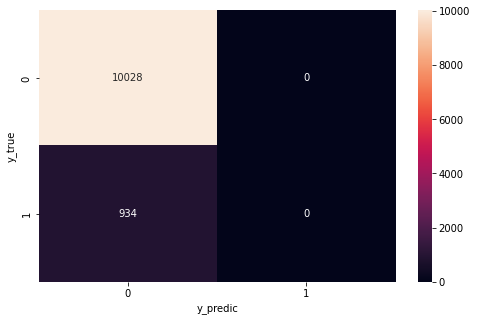

In [60]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction0_class), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_predic")
plt.ylabel("y_true")
plt.show()

The model only recognizes class 0

# Handling Imbalance Dataset

In [83]:
# Define weights for handling imbalance dataset, where class 0 around by 10 times class 1

weights_asigned = {0:1, 1:10}

In [84]:
# Training model

model.fit(X_train, y_train, batch_size=42, epochs=100, class_weight=weights_asigned)

Epoch 1/100
1044/1044 [==============================] - 3s 2ms/step - loss: 1.2278 - accuracy: 0.6782
Epoch 2/100
1044/1044 [==============================] - 3s 3ms/step - loss: 1.2233 - accuracy: 0.8224
Epoch 3/100
1044/1044 [==============================] - 3s 3ms/step - loss: 1.2235 - accuracy: 0.8484
Epoch 4/100
1044/1044 [==============================] - 3s 3ms/step - loss: 1.2222 - accuracy: 0.7547
Epoch 5/100
1044/1044 [==============================] - 2s 2ms/step - loss: 1.2217 - accuracy: 0.7451
Epoch 6/100
1044/1044 [==============================] - 2s 2ms/step - loss: 1.2215 - accuracy: 0.7514
Epoch 7/100
1044/1044 [==============================] - 2s 2ms/step - loss: 1.2215 - accuracy: 0.7363
Epoch 8/100
1044/1044 [==============================] - 3s 3ms/step - loss: 1.2222 - accuracy: 0.7630
Epoch 9/100
1044/1044 [==============================] - 3s 3ms/step - loss: 1.2215 - accuracy: 0.7536
Epoch 10/100
1044/1044 [==============================] - 3s 2ms/step - l

# Test Model

In [85]:
prediction = model.predict(X_test)
prediction_class = [1 if i>0.5 else 0 for i in prediction]

# Model performance
print(classification_report(y_test, prediction_class))

343/343 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10028
           1       0.11      0.15      0.12       934

    accuracy                           0.82     10962
   macro avg       0.51      0.52      0.51     10962
weighted avg       0.85      0.82      0.83     10962



In [86]:
# Check the ROC/AUC value

print(f'The ROC/AUC value is {roc_auc_score(y_test, prediction_class):.3f}.')

The ROC/AUC value is 0.515.


In [87]:
# Confusion matrix

confusion_matrix(y_test, prediction_class)

array([[8866, 1162],
       [ 797,  137]])

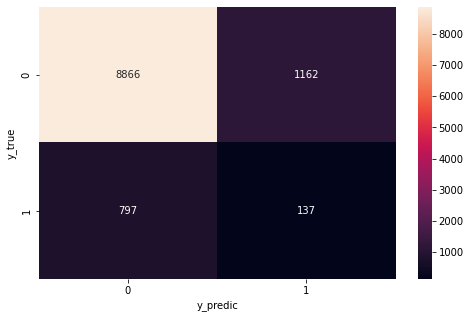

In [88]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction_class), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_predic")
plt.ylabel("y_true")
plt.show()